In [ ]:
!pip install kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:04<00:00, 95.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [ ]:
import shutil
import os

source_directory = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1"
destination_directory = "waste_classification_data"  # Visible directory name (relative path)

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Construct the full destination path
full_destination_path = os.path.join(destination_directory, "1") #Creates a folder called 1 inside the destination folder.

try:
    shutil.copytree(source_directory, full_destination_path)
    print(f"Directory copied to: {full_destination_path}")
except FileExistsError:
    print(f"Destination directory '{full_destination_path}' already exists.")
except FileNotFoundError:
    print(f"Source directory '{source_directory}' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Directory copied to: waste_classification_data/1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import cv2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
#from tensorflow.keras.utils import plot_model

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_path = "waste_classification_data/1/DATASET/TRAIN"
test_path = "waste_classification_data/1/DATASET/TEST"

In [ ]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 9999/9999 [00:03<00:00, 3309.36it/s]


In [ ]:
data.shape

(22564, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'O': 12565, 'R': 9999})

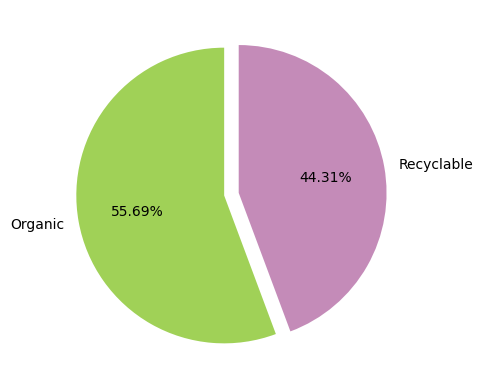

In [ ]:
colors = ['#a0d157','#c48bb8']

plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=1)
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [ ]:
model = Sequential()
# Convolutional Block 1
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), padding='same'))
model.add(BatchNormalization())  # Add batch normalization
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())  # Add batch normalization
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 3
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())  # Add batch normalization
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass))  # Output layer
model.add(Activation("sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      25,690,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             1

 Total params: 25,801,090 (98.42 MB)

 Trainable params: 25,800,642 (98.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = 32,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = 32,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train the model
hist = model.fit(
    x=train_generator,
    epochs=10,
    validation_data = test_generator,
    callbacks = [early_stopping]  # Add Early Stopping
)

Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 64s 75ms/step - accuracy: 0.5947 - loss: 3.2359 - val_accuracy: 0.5575 - val_loss: 0.6870
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 46s 65ms/step - accuracy: 0.5584 - loss: 0.6869 - val_accuracy: 0.5575 - val_loss: 0.6865
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 48s 67ms/step - accuracy: 0.5590 - loss: 0.6862 - val_accuracy: 0.5575 - val_loss: 0.6865
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 48s 67ms/step - accuracy: 0.5591 - loss: 0.6863 - val_accuracy: 0.5575 - val_loss: 0.6865
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 49s 69ms/step - accuracy: 0.5612 - loss: 0.6857 - val_accuracy: 0.5575 - val_loss: 0.6865
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 45s 63ms/step - accuracy: 0.5572 - loss: 0.6866 - val_accuracy: 0.5575 - val_loss: 0.6865
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 48s 67ms/step - accuracy: 0.5544 - loss: 0.6873 - val_accuracy: 0.5575 - val_loss: 0.6865
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 46s 65ms/step - accuracy: 0.5530 - loss: 0.6875 - 

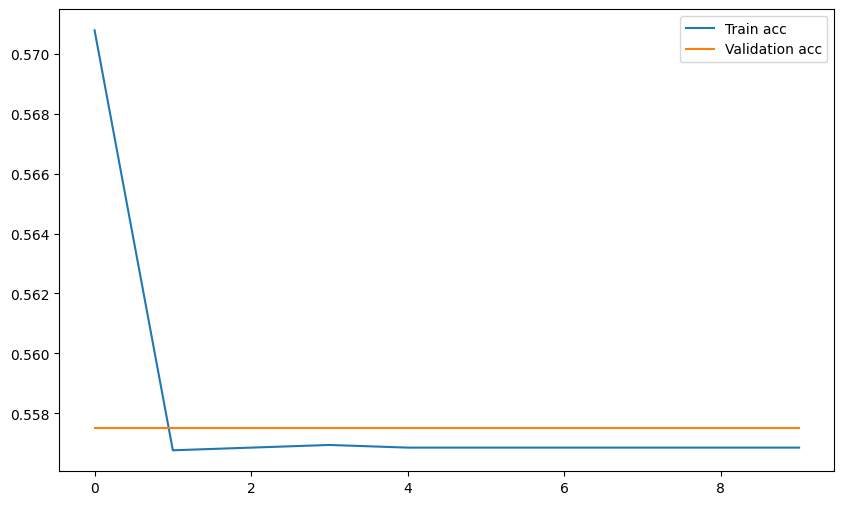

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

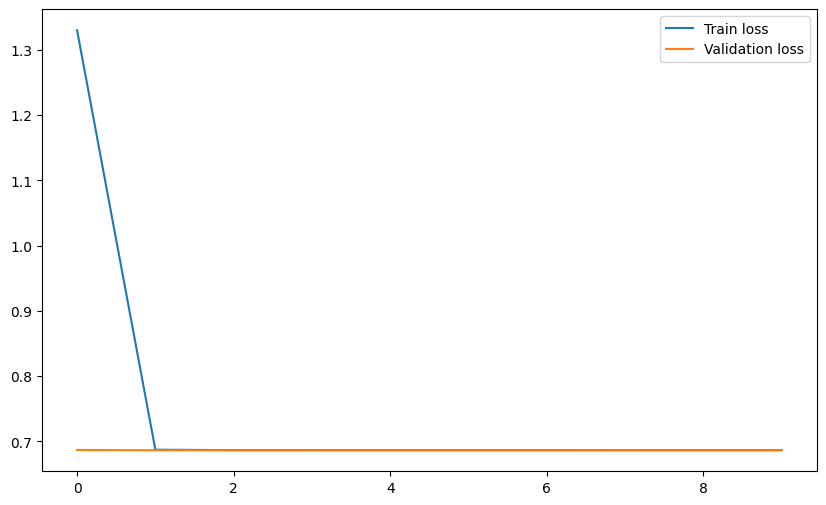

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [ ]:
# After training the model, save it to a file
model.save('waste_classifier_cnn.h5')

In [ ]:
# import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# import cv2 # Make sure to import cv2

# # Path to the trained model and test image
# model_path = 'waste_classifier_cnn.h5'
# test_img = r"plastic_img.jpg"  # Store the path as a string
# #test_img = cv2.imread("DATASET/TEST/O/O_12573.jpg")

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2  # Make sure to import cv2
import os
from google.colab import files

# Path to the trained model
model_path = 'waste_classifier_cnn.h5'

# Upload the image file
uploaded = files.upload()
test_img = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Load the trained model
model = tf.keras.models.load_model(model_path)

Saving ufo1.png to ufo1.png


In [ ]:
# Load the trained model
model = tf.keras.models.load_model(model_path)

In [ ]:
# def predict_func(img_path):  # Update function to accept image path
#     img = cv2.imread(img_path)  # Read the image using cv2.imread
#     plt.figure(figsize=(6,4))
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Now img is a NumPy array
#     plt.tight_layout()
#     img = cv2.resize(img, (224, 224))
#     img = np.reshape(img, [-1, 224, 224,3])
#     result = np.argmax(model.predict(img))
#     if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
#     elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

def predict_func(img_path):
    # Get the absolute path of the image (already in /content/)
    # img_path = os.path.abspath(img_path)  # No need for abspath in Colab

    # Check if the image file exists
    if not os.path.exists(img_path):
        print(f"Error: Image file not found at {img_path}")
        return

    img = cv2.imread(img_path)  # Read the image using cv2.imread

    # Check if the image was loaded successfully
    if img is None:
        print(f"Error: Could not load image from {img_path}")
        return

    plt.figure(figsize=(6, 4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Now img is a NumPy array
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224, 3])
    result = np.argmax(model.predict(img))
    if result == 0:
        print("\033[94m" + "This image -> Recyclable" + "\033[0m")
    elif result == 1:
        print("\033[94m" + "This image -> Organic" + "\033[0m")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
This image -> Organic


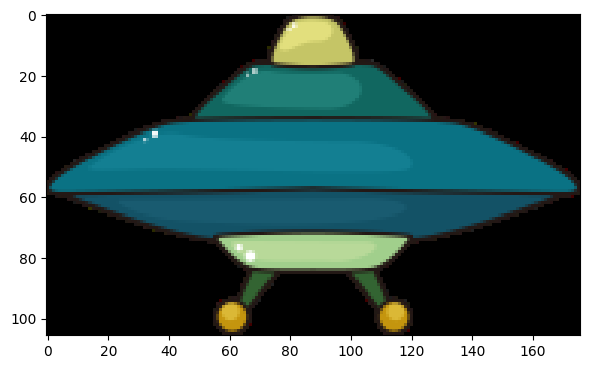

In [ ]:
# Call predict_func with the image path
predict_func(test_img)